## Problem Introduction
Stress is one of the biggest challenges students face today. Heavy workloads, balancing school with jobs or extracurriculars, and pressure to perform well all contribute to higher stress levels. Understanding and predicting these stress levels is valuable because it can highlight when students may need support, whether through healthier study habits, better time management, or access to campus resources.

The main question for this project is: Can machine learning models classify student stress levels based on personal and behavioral data?

This is a classification problem because the target variable, student stress level, is divided into categories such as low, moderate, and high. By applying several models, including Naive Bayes, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forests, I aim to compare their performance, identify which features are most important, and reflect on how data can reveal meaningful patterns in student well-being

## Dataset Introduction

The dataset used in this project is the **Student Stress Monitoring Dataset**, available on Kaggle:  
[Student Stress Monitoring Datasets on Kaggle](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets?resource=download)

This dataset focuses on student well-being by capturing academic, social, and personal factors that may influence their stress levels. The target variable is **stress_level**, which is divided into categories such as low, moderate, and high. Which display as 0, 1 or 2. The features represent a wide range of influences, including health conditions, study load, family and social support, and environmental factors.

The main features are listed below with short explanations:

| Feature | Description |
|---------|-------------|
| `anxiety_level` | Self-reported level of anxiety |
| `self_esteem` | Student’s self-esteem rating |
| `mental_health_history` | Whether the student has a history of mental health issues |
| `depression` | Presence of depressive symptoms |
| `headache` | Whether the student experiences headaches |
| `blood_pressure` | Information on blood pressure issues |
| `sleep_quality` | Quality of sleep reported |
| `breathing_problem` | Whether the student has breathing problems |
| `noise_level` | Exposure to noise in their environment |
| `living_conditions` | Quality of living conditions |
| `safety` | Sense of safety in their surroundings |
| `basic_needs` | Whether basic needs (food, housing, etc.) are met |
| `academic_performance` | Self-reported academic performance |
| `study_load` | Amount of workload or study load |
| `teacher_student_relationship` | Quality of relationship with teachers |
| `future_career_concerns` | Concerns about future career prospects |
| `social_support` | Support from peers, family, or friends |
| `peer_pressure` | Pressure from peers to behave_


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Load your dataset
df = pd.read_csv("stressleveldataset.csv")

# Show first few rows
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


## Preprocessing the Data

Before training the models, the dataset needed some preparation so the inputs would be consistent and the models could learn effectively. The stress_level column was separated from the other features. The features (X) include academic, personal, and social factors, while the target (y) represents the student’s stress category of low, moderate, or high.  

A train-test split was used to divide the dataset into training (80 percent) and testing (20 percent) sets. This step is important because it prevents overfitting and allows the models to be evaluated on data they have not seen before.  

Some of the models used in this project, such as K-Nearest Neighbors and Support Vector Machines, are sensitive to feature scaling because they rely on distance calculations. In a more advanced version of this project, it would be useful to apply standardization with a tool like StandardScaler so that all features are on the same scale.  

For this analysis, the dataset did not require dropping columns or extensive cleaning since the values were already numeric and structured. This made it straightforward to prepare the data for classification.



In [23]:
X = df.drop("stress_level", axis=1)  
y = df["stress_level"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Data Understanding and Visualization

To better understand the dataset, I first checked the distribution of the target variable stress_level. This showed how balanced the categories (low, moderate, high) were, which is important because imbalance can affect model accuracy.  

I then created a correlation heatmap to see relationships among features. Anxiety, depression, and sleep quality showed strong connections with stress, which supports their importance in classification.  

Finally, I looked at plots of features such as anxiety and self-esteem against stress level. These revealed clear trends where higher anxiety and lower self-esteem were linked with higher stress.  

Overall, these visualizations confirmed that the dataset contains meaningful patterns that connect academic, personal, and social factors to student stress, making it well-suited for classification models.


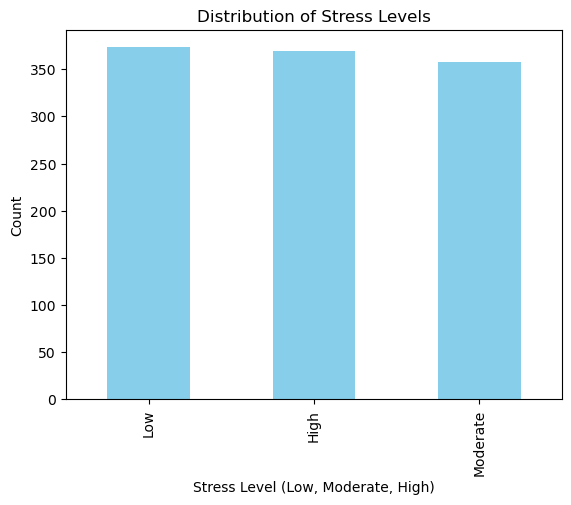

In [37]:
# Distribution of stress levels
df["stress_level"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (Low, Moderate, High)")
plt.ylabel("Count")
plt.show()

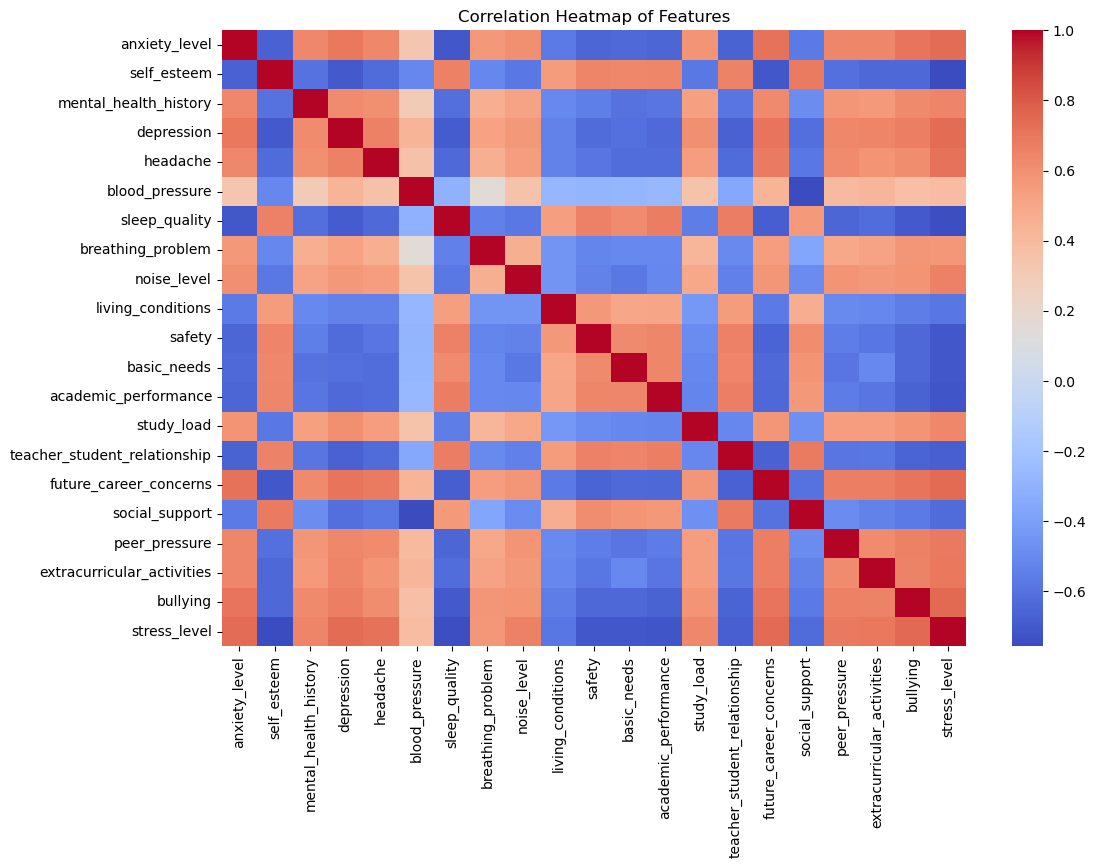

In [31]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

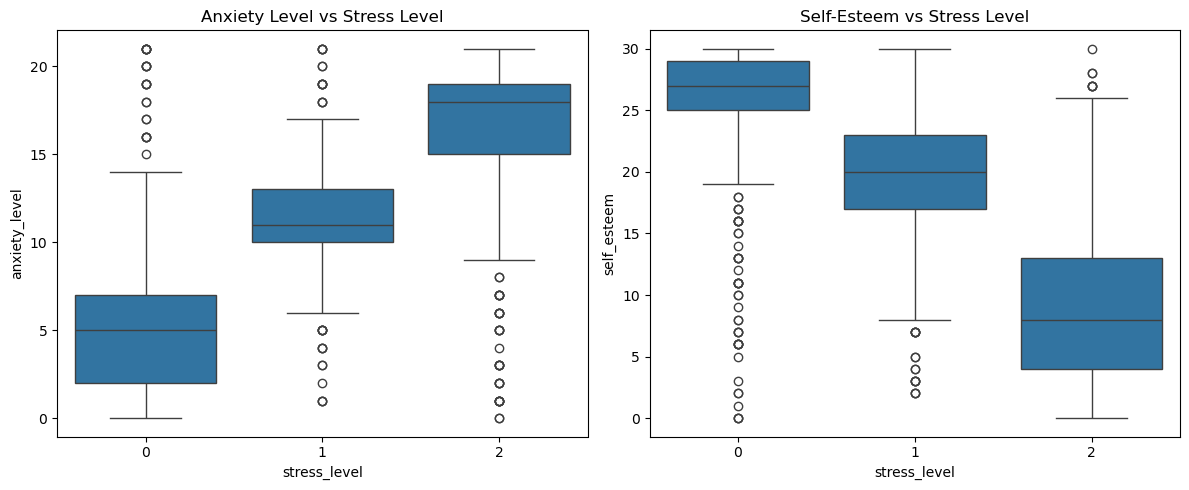

In [32]:
# Boxplots of features against stress level
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="stress_level", y="anxiety_level", data=df)
plt.title("Anxiety Level vs Stress Level")

plt.subplot(1,2,2)
sns.boxplot(x="stress_level", y="self_esteem", data=df)
plt.title("Self-Esteem vs Stress Level")

plt.tight_layout()
plt.show()

## Evaluation

After training each model on the training data, I tested them on the unseen test set to measure their performance. The main metric I used was accuracy, which shows the proportion of correct predictions out of all predictions. Accuracy is a simple and clear way to compare models, but it does not always give the full picture, especially if the classes are unbalanced.  

The results showed that Naive Bayes and Support Vector Machine performed the best, both reaching around 90 percent accuracy. K-Nearest Neighbors and Random Forest also performed well, with accuracies close to 88 percent. These results suggest that multiple approaches are capable of classifying stress levels effectively, though the small differences between them highlight that no single method is clearly dominant.  

In a more complete evaluation, it would be useful to look at confusion matrices and classification reports (precision, recall, and F1 score) to understand not just how often the models are correct, but also how they handle each stress category individually. This would give more insight into whether the models are better at identifying low, moderate, or high stress levels.


## Modeling

I tested four machine learning models to classify student stress levels:

- **Naive Bayes**: Uses probabilities based on feature distributions. It’s simple, fast, and works well on text-like or categorical data. Weakness: assumes independence between features.  
- **K-Nearest Neighbors (KNN)**: Classifies by looking at the closest data points. Easy to understand and good for small datasets, but slower on large ones.  
- **Support Vector Machine (SVM)**: Finds the best boundary between classes. Strong for high-dimensional data but can be slower to train.  
- **Random Forest**: Combines many decision trees. Handles complex data and avoids overfitting, but can be less interpretable.  


In [24]:
# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

In [25]:
# Store results
trained_models = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    trained_models[name] = model
    print(f"{name} Accuracy: {acc:.2f}")


Naive Bayes Accuracy: 0.90
KNN Accuracy: 0.88
SVM Accuracy: 0.90
Random Forest Accuracy: 0.87


               Accuracy
Naive Bayes    0.900000
KNN            0.877273
SVM            0.895455
Random Forest  0.868182


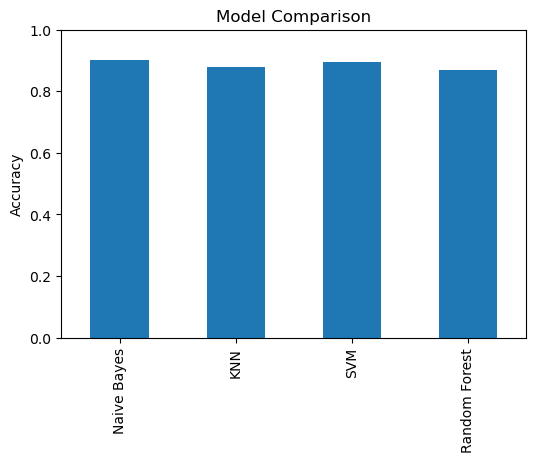

In [26]:
# Put results in a DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])

# Show results table
print(results_df)

# Plot bar chart
results_df.plot(kind="bar", legend=False, figsize=(6,4))
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

## Storytelling and Conclusion

The main question of this project was whether machine learning models could classify student stress levels based on academic, personal, and social factors. By testing four different models, I was able to compare their strengths and see how well they handled this problem.  

The results showed that both Naive Bayes and Support Vector Machine reached about 90 percent accuracy, while K-Nearest Neighbors and Random Forest were close behind at around 88 percent. This means that more than one approach is effective, but Naive Bayes and SVM were slightly stronger overall.  

These results suggest that student stress is influenced by multiple factors in ways that models can recognize and use to make predictions. The models were able to identify patterns between features such as anxiety, self-esteem, academic performance, and social support, and connect them to different levels of stress.  

In the end, the project answered the original question: machine learning can classify student stress levels with fairly high accuracy. While no model was perfect, the analysis shows the potential of using data to better understand stress patterns and provide insights that could guide student support systems.


## Impact 
Using machine learning to classify student stress has both potential benefits and risks. On the positive side, accurate stress prediction could help schools and universities recognize patterns that contribute to student burnout. This could guide better support systems such as tutoring, counseling services, or adjustments in workload expectations. It also creates opportunities for early interventions, where students showing high predicted stress could be offered resources before reaching a crisis point.

However, there are also risks to consider. If misused, predictive models might be applied in ways that place blame on students instead of helping them. There is also the possibility of bias in the dataset, meaning certain groups of students might be unfairly labeled as more stressed than others. Finally, relying too heavily on automated predictions could reduce the focus on individual conversations between students and educators.

Overall, while stress classification models can be a powerful tool for supporting student well-being, they need to be used responsibly, with careful attention to fairness, privacy, and ethical application.

## References

Islam Ovi, M. S. (2023). *Student Stress Monitoring Datasets*. Kaggle.  
https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets  

Brownlee, J. (2016). *Supervised Machine Learning Algorithms*. Machine Learning Mastery.  
https://machinelearningmastery.com/supervised-learning-algorithms/  
